In [1]:
!pip install pycaret

     |████████████████████████████████| 263 kB 5.1 MB/s 
     |████████████████████████████████| 2.0 MB 35.0 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 14.4 MB 62 kB/s 
     |████████████████████████████████| 1.3 MB 59.7 MB/s 
     |████████████████████████████████| 6.8 MB 55.0 MB/s 
     |████████████████████████████████| 1.7 MB 42.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 248 kB 61.1 MB/s 
     |████████████████████████████████| 271 kB 69.2 MB/s 
     |████████████████████████████████| 80 kB 9.0 MB/s 
     |████████████████████████████████| 105 kB 57.6 MB/s 
     |████████████████████████████████| 167 kB 62.3 MB/s 
     |████████████████████████████████| 636 kB 41.2 MB/s 
     |████████████████████████████████| 3.1 MB 38.0 MB/s 
     |███████████████████

In [37]:
import pandas as pd
df = pd.read_csv("/content/creditcard.csv")              # Uploading on Colab

data = df.sample(frac=0.1, random_state=1)               # Sample 10% of the original data to reduce training time 
data.reset_index(drop=True, inplace=True)
print('Smaller Dataset:', data.shape)

Smaller Dataset: (28481, 31)


In [3]:
data_unseen = data.sample(frac=0.1, random_state=1)      # Sample 10% of the data to become the unseen test set
data = data.drop(data_unseen.index)                      # Use the remaining 90% as the training (& validation) data

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Model Training & Validation: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (25633, 31)
Unseen Data For Predictions: (2848, 31)


In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,-0.854023,0.547347,0.616448,-0.101785,-0.608492,-0.288559,-0.606199,-0.900746,-0.201311,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
1,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,0.096501,0.710309,0.778924,0.353867,0.953048,-0.103542,0.128899,-0.964070,-0.477130,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
2,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,-0.813214,0.111898,1.133875,-0.649766,0.861035,0.583787,-0.344094,0.028312,0.219760,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
3,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,0.905210,-0.277872,-1.336179,-0.012238,0.212828,0.769345,-1.010534,0.357288,-0.125585,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
4,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,0.101512,-0.433200,-0.634867,-1.188354,1.028063,0.576121,1.068353,0.332690,-0.362811,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [5]:
from pycaret.classification import *

In [6]:
expt = setup(
    data = data, 
    target = 'Class', 
    session_id=1,                       # Random seed to ensure reproducibility of the experiment with the same data
    train_size=0.8,                     # 80% training data & 20% held-out validation data 
    normalize=True,
    normalize_method="minmax",
    polynomial_features=True,
    trigonometry_features=True,
    fix_imbalance = True
)

,Description,Value
0,session_id,1
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(25633, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [8]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7f58b977def0>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<function roc_auc_score at 0x7f58b97e9ef0>,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=macro)",pred,{'average': 'macro'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7f58b9785440>,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7f58b97857a0>,make_scorer(matthews_corrcoef),pred,{},True,True,False


In [9]:
top5 = compare_models(sort='F1', fold=5, n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9994,0.9662,0.7464,0.8937,0.8021,0.8018,0.8107,2.088
rf,Random Forest Classifier,0.9991,0.9542,0.6321,0.8314,0.6825,0.6821,0.7049,13.734
gbc,Gradient Boosting Classifier,0.9984,0.9379,0.6893,0.5449,0.6034,0.6026,0.6094,59.408
ada,Ada Boost Classifier,0.9981,0.9293,0.6321,0.5061,0.5395,0.5386,0.5532,11.588
knn,K Neighbors Classifier,0.9970,0.8723,0.7464,0.3697,0.4852,0.4839,0.5187,7.938
lightgbm,Light Gradient Boosting Machine,0.9983,0.9040,0.4607,0.5377,0.4768,0.4760,0.4869,1.836
dt,Decision Tree Classifier,0.9977,0.6370,0.2750,0.4145,0.2934,0.2923,0.3160,2.290
svm,SVM - Linear Kernel,0.9873,0.0000,0.7821,0.1112,0.1914,0.1889,0.2866,0.194
lr,Logistic Regression,0.9856,0.9436,0.8607,0.1014,0.1804,0.1778,0.2906,1.754
lda,Linear Discriminant Analysis,0.9848,0.8910,0.8071,0.0888,0.1598,0.1572,0.2643,0.446


In [10]:
et = top5[0]

et_params = {
    'min_samples_split': np.arange(2, 10, 1),
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'max_features': ["auto", "sqrt", "log2"],
}

tuned_et = tune_model(et, optimize='F1', custom_grid=et_params, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.9304,0.8750,0.7778,0.8235,0.8232,0.8246
1,0.9995,0.9885,0.8571,0.8571,0.8571,0.8569,0.8569
2,0.9995,0.9941,0.7143,1.0000,0.8333,0.8331,0.8449
3,0.9995,0.9197,0.7143,1.0000,0.8333,0.8331,0.8449
4,0.9993,0.9982,0.7143,0.8333,0.7692,0.7689,0.7712
Mean,0.9994,0.9662,0.7750,0.8937,0.8233,0.8230,0.8285
SD,0.0001,0.0339,0.0746,0.0906,0.0292,0.0293,0.0305


In [13]:
rf = top5[1]

rf_params = {
    'min_samples_split': np.arange(5, 10, 1),
    'max_depth': [int(x) for x in np.linspace(20, 110, num = 11)],
    'max_features': ["auto", "sqrt", "log2"],
}

tuned_rf = tune_model(rf, optimize='F1', custom_grid=rf_params, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9990,0.9313,0.8750,0.7000,0.7778,0.7773,0.7822
1,0.9993,0.9199,0.7143,0.8333,0.7692,0.7689,0.7712
2,0.9988,0.9985,0.2857,1.0000,0.4444,0.4440,0.5342
3,0.9990,0.9207,0.5714,0.8000,0.6667,0.6662,0.6757
4,0.9998,0.9984,0.8571,1.0000,0.9231,0.9230,0.9257
Mean,0.9992,0.9538,0.6607,0.8667,0.7162,0.7159,0.7378
SD,0.0003,0.0367,0.2172,0.1174,0.1586,0.1586,0.1294


In [16]:
gbc = top5[2]

gbc_params = {
    'min_samples_split': np.arange(6, 11, 1),
    'max_depth': [int(x) for x in np.linspace(3, 4)],
    'learning_rate': np.arange(0.1, 1, 0.1),
    'max_features': ["auto", "sqrt", "log2"]
}

tuned_gbc = tune_model(gbc, optimize='F1', custom_grid=gbc_params, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9990,0.9124,0.8750,0.7000,0.7778,0.7773,0.7822
1,0.9995,0.9845,0.8571,0.8571,0.8571,0.8569,0.8569
2,0.9995,0.8172,0.7143,1.0000,0.8333,0.8331,0.8449
3,0.9993,0.9446,0.8571,0.7500,0.8000,0.7996,0.8014
4,0.9988,0.9964,0.8571,0.6000,0.7059,0.7053,0.7166
Mean,0.9992,0.9310,0.8321,0.7814,0.7948,0.7944,0.8004
SD,0.0003,0.0642,0.0593,0.1371,0.0521,0.0523,0.0501


In [17]:
ada = top5[3]

tuned_ada = tune_model(ada, optimize='F1', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9990,0.9264,0.8750,0.7000,0.7778,0.7773,0.7822
1,0.9985,0.9673,0.5714,0.5714,0.5714,0.5707,0.5707
2,0.9993,0.9173,0.5714,1.0000,0.7273,0.7269,0.7557
3,0.9990,0.9881,0.8571,0.6667,0.7500,0.7495,0.7555
4,0.9988,0.9961,0.8571,0.6000,0.7059,0.7053,0.7166
Mean,0.9989,0.9590,0.7464,0.7076,0.7065,0.7059,0.7161
SD,0.0002,0.0319,0.1430,0.1532,0.0716,0.0717,0.0757


In [14]:
knn = top5[4]

knn_params = {
    'n_neighbors': np.arange(2, 5),
    'p': np.arange(1, 2),
    'leaf_size': np.arange(10, 50, 10)
}

tuned_knn = tune_model(knn, optimize='F1', custom_grid=knn_params, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9990,0.9371,0.8750,0.7000,0.7778,0.7773,0.7822
1,0.9990,0.9282,0.8571,0.6667,0.7500,0.7495,0.7555
2,0.9985,0.7851,0.4286,0.6000,0.5000,0.4993,0.5064
3,0.9993,0.8570,0.5714,1.0000,0.7273,0.7269,0.7557
4,0.9993,0.8569,0.7143,0.8333,0.7692,0.7689,0.7712
Mean,0.9990,0.8729,0.6893,0.7600,0.7049,0.7044,0.7142
SD,0.0003,0.0555,0.1704,0.1420,0.1039,0.1040,0.1044


In [18]:
blended_model = blend_models(estimator_list=[tuned_et, tuned_rf, tuned_gbc, tuned_ada, tuned_knn])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9985,0.8775,0.7500,0.6000,0.6667,0.6659,0.6701
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9990,0.9715,0.7500,0.7500,0.7500,0.7495,0.7495
4,0.9995,0.9559,0.7500,1.0000,0.8571,0.8569,0.8658
5,0.9990,0.9885,0.5000,1.0000,0.6667,0.6662,0.7068
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9980,0.9974,0.3333,0.3333,0.3333,0.3324,0.3324
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9995,0.9998,1.0000,0.7500,0.8571,0.8569,0.8658


In [20]:
predict_model(blended_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.999,0.8741,0.375,1.0,0.5455,0.5451,0.6121


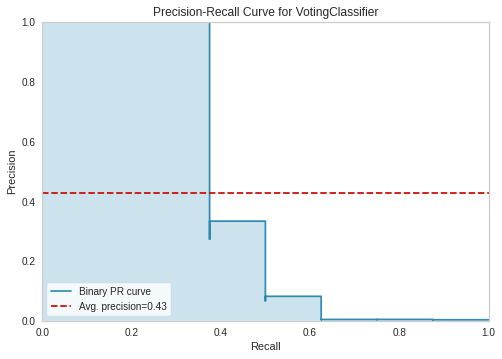

In [21]:
plot_model(blended_model, plot="pr")

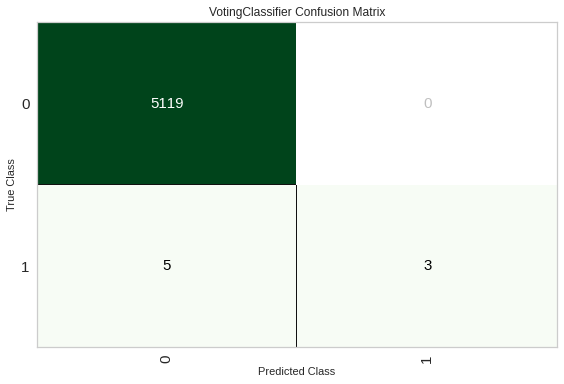

In [32]:
plot_model(blended_model, plot="confusion_matrix")

In [23]:
unseen_predictions = predict_model(blended_model, data=data_unseen)
unseen_predictions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,147004.0,-0.472661,-1.430584,-0.116832,-2.528959,0.975027,1.077347,-0.436959,0.426111,-2.597479,1.040628,0.927868,-0.421479,0.185618,0.122651,-0.062603,-1.432718,1.047604,-0.969065,-0.365168,-0.020614,-0.074423,-0.127588,0.561987,-0.803431,-1.137093,-0.408330,0.208716,0.218764,100.00,0,0,0.9252
1,143238.0,-0.298687,0.932025,-0.460979,-0.922886,0.321475,-1.422644,0.773147,0.170359,0.025994,-0.967558,-1.389222,-0.536312,-1.370675,0.981049,-0.027313,0.097970,-0.572605,0.156111,-1.066196,-0.491993,0.454823,1.210077,-0.065351,-0.020786,-0.816140,-0.406927,0.112648,0.187384,5.34,0,0,0.9219
2,3073.0,1.188739,-0.110925,-0.247423,-0.056450,-0.230669,-0.884735,0.252123,-0.107019,-0.128072,0.071498,0.968910,-0.024447,-1.621853,0.978853,0.291896,0.402306,-0.446079,-0.188215,0.685256,-0.053187,-0.339530,-1.248046,0.070858,-0.003754,0.148766,0.706722,-0.132117,-0.008134,58.92,0,0,0.9278
3,88926.0,0.080975,0.866882,-0.367443,-0.620509,0.801360,-0.530850,0.767727,0.137662,-0.093225,-0.632488,0.913679,-0.159862,-1.588552,-0.511763,-0.738067,0.504221,0.300654,0.334100,-0.047465,-0.070243,-0.291797,-0.798181,0.128168,0.560247,-0.531633,0.097231,0.211335,0.071850,5.49,0,0,0.9222
4,72013.0,-0.523168,0.504064,2.327159,1.033996,-0.256216,0.920008,0.123060,0.452847,0.348782,-0.681415,0.635343,1.648594,-0.041779,-0.694016,-2.750629,-1.155485,0.570649,-0.782156,0.541355,-0.110084,-0.211943,-0.184578,0.053897,0.224449,-0.507835,-0.653984,0.232471,0.162894,20.00,0,0,0.9123


In [33]:
from pycaret.utils import check_metric

print("Accuracy:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Accuracy'))
print("Precision:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Precision'))
print("Recall:\t\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Recall'))
print("F1 Score:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'F1'))

Accuracy:	 1.0
Precision:	 1.0
Recall:		 1.0
F1 Score:	 1.0


In [38]:
save_model(blended_model, '/content/pycaret_expt1')                # Saving on Colab

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                               ('ada',
                                                AdaBoostClassifier(algorithm='SAMME.R',
                                                                   base_estimator=None,
                                           